In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [2]:
import matplotlib

In [31]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [242]:
import pandas as pd
import seaborn as sns
import time
import copy

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [15]:
import os
import h5py

In [28]:
from numpy.fft import ifftshift, ifft2, fftshift, fft2
from numpy import exp, pi, mean, var, std, abs, sin, cos, sum

In [8]:
os.chdir('/Volumes/jorgeamu/AFRL/dump1/hdf5_files/')

In [9]:
filenames = [os.path.abspath(x) for x in os.listdir()]

In [10]:
len(filenames)

10000

In [16]:
filename = filenames[0]
f = h5py.File(filename, 'r')

In [19]:
# generate target
Uin = f['PUMP']['Data'][0,:,:]
N = 256
Lout = 10
Lin = 10e-3
deltax = 0.005
wvl = 0.532e-6
Dz = 10e3
nscreen = 10
kpow = 22/6
Rytov = 0.02
Np = 5

In [20]:
#phase screen parameter dictionary, hard-coded, WIP
phz_params_dict = {}
phz_params_dict['N'] = N
phz_params_dict['Lout'] = Lout
phz_params_dict['Lin'] = Lin
phz_params_dict['deltax'] = deltax
phz_params_dict['wvl'] = wvl
phz_params_dict['Dz'] = Dz
phz_params_dict['nscreen'] = nscreen
phz_params_dict['kpow'] = kpow
phz_params_dict['Rytov'] = Rytov
phz_params_dict['Np'] = Np

In [22]:
def ft_sh_phase_screen(Uin, phz_params_dict, genetic_code=None):
    N = phz_params_dict['N']
    Lout = phz_params_dict['Lout']
    Lin = phz_params_dict['Lin']
    deltax = phz_params_dict['deltax']
    wvl = phz_params_dict['wvl']
    Dz = phz_params_dict['Dz']
    nscreen = phz_params_dict['nscreen']
    kpow = phz_params_dict['kpow']
    Rytov = phz_params_dict['Rytov']
    Np = phz_params_dict['Np']

    k=2*pi/wvl
    nn=np.arange(-np.floor(N/2), np.floor(N/2))
    nx, ny = np.meshgrid(nn, nn)
    nsq = nx**2 + ny**2
    z=np.linspace(0, Dz, nscreen)

    deltaz=z[1]-z[0]
    deltaf=1/(N*deltax)

    # 0.312 is weird
    #Cn2=Rytov/(0.312 * k**(7/6) * Dz**(11/6))
    Cn2=Rytov/(1.2287075122549518 * k**(7/6) * Dz**(11/6))
    r0 = (.423*k**2*Cn2*Dz)**(-3/5) #check

    fx=nx*deltaf
    fy=ny*deltaf
    fsq=fx**2+fy**2

    Uin=Uin #np.ones([N, N])
    g=Uin

    # Generate 2x nscreens NxN arrays
    if genetic_code is None:
        genetic_code = np.zeros([N, N, nscreen, 2])
        for idx in range(nscreen-1):
            genetic_code[:,:,idx,0] = np.random.randn(N, N)
            genetic_code[:,:,idx,1] = np.random.randn(N, N)

    for idx in range(nscreen-1):
        #r0 = (.423*(k**2)*Cn2*deltaz)**(-3/5) # Constant Cn2
					 
        fm = 5.92/Lin/(2*pi)
        f0=1/Lout

        PSD_phi = 0.023 * r0**(-5/3) * exp(-(fsq/fm**2)) / (fsq + f0**2)**(kpow/2)
        PSD_phi[int(N/2),int(N/2)] = 0
        
        cnm = (genetic_code[:,:,idx,0] + 1j*genetic_code[:,:,idx,1]) * np.sqrt(PSD_phi)*deltaf
        #cnm = (np.random.randn(N, N) + 1j*np.random.randn(N, N) ) * np.sqrt(PSD_phi)*deltaf

        phz_hi = np.real(ifftshift(ifft2(ifftshift(cnm)))*(N*1)**2)
        phz_lo = np.zeros([N, N])
		  #phz_lo = subharmonics(Np, phz_hi)
        phz = phz_hi + phz_lo
		  
        Q2 = exp(-1j*pi**2*2*deltaz/k*fsq)
        G= Q2*fftshift(fft2(fftshift(g)))*deltax**2
        g = ifftshift(ifft2(ifftshift(G)))*(N*deltaf)**2
        g = exp(1j*phz) * g
		  
    Uout = g
    
    return Uout


In [29]:
Uout = ft_sh_phase_screen(Uin, phz_params_dict=phz_params_dict, genetic_code=None)

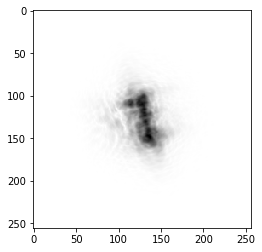

In [36]:
plt.imshow(abs(Uout), cmap='binary')

In [ ]:
X = []
y = []
for T in [1, 2, 3, 4, 5]:
    for rho in rho_vals:
        X.append([T, rho])
        y.append(master(T, rho))

In [38]:
import networkx as nx

In [228]:
G = nx.DiGraph()

In [229]:
G.add_node('A00')

In [230]:
def func(x):
    prefix = ''
    if x == 0:
        prefix = 'A'
    elif x == 1:
        prefix = 'B'
    elif x == 2:
        prefix = 'C'
    elif x == 3:
        prefix = 'D'
    elif x == 4:
        prefix = 'E'
    elif x ==5:
        prefix = 'F'
    elif x ==6:
        prefix = 'G'
    elif x ==7:
        prefix = 'H'
    else:
        return None
     
    nodes = []
    for i in range(-x, x+1):
        for j in range(-abs(abs(i)-x),abs(abs(i)-x)+1):
            node = prefix + str(i) + str(j)
            nodes.append((node, i, j))
            
    return nodes


In [231]:
for i in range(7):
    print(i, len(func(i)))

0 1
1 5
2 13
3 25
4 41
5 61
6 85


In [232]:
func(0)

[('A00', 0, 0)]

In [233]:
label, i, j = func(0)[0]
G.add_node(label, x=i, y=j)

In [235]:
list(G.nodes)

['A00']

In [236]:
for f in func(1):
    label, i, j = f
    G.add_node(label, x=i, y=j)
    G.add_edge('A00', label)

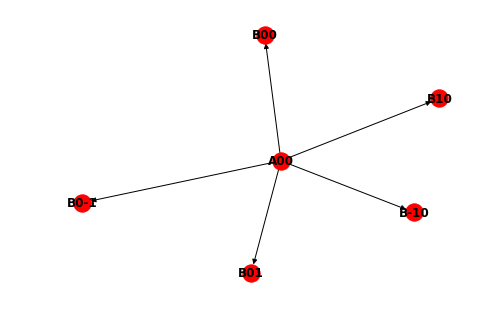

In [237]:
nx.draw(G, with_labels=True, font_weight='bold')

In [238]:
for node in list(G.nodes):
    print(node)

A00
B-10
B0-1
B00
B01
B10


In [239]:
f2 = func(2)

In [240]:
source = 'A00'
for node in G.nodes.data():
    if 'B' in node[0]:
        G.add_edge('A00', node[0])

In [241]:
f2

[('C-20', -2, 0),
 ('C-1-1', -1, -1),
 ('C-10', -1, 0),
 ('C-11', -1, 1),
 ('C0-2', 0, -2),
 ('C0-1', 0, -1),
 ('C00', 0, 0),
 ('C01', 0, 1),
 ('C02', 0, 2),
 ('C1-1', 1, -1),
 ('C10', 1, 0),
 ('C11', 1, 1),
 ('C20', 2, 0)]

In [243]:
_ = copy.deepcopy(G.nodes.data())
for node in _:
    if 'B' in node[0]:
        source = node[0]
    else:
        continue
        
    x = node[1]['x']
    y = node[1]['y']
    
    for f in f2:
        if f[1]-x in [-1, 0, 1] and f[2]-y in [-1, 0, 1]:
            G.add_edge(node[0], f[0])
            G.nodes[f[0]]['x'] = f[1]
            G.nodes[f[0]]['y'] = f[2]

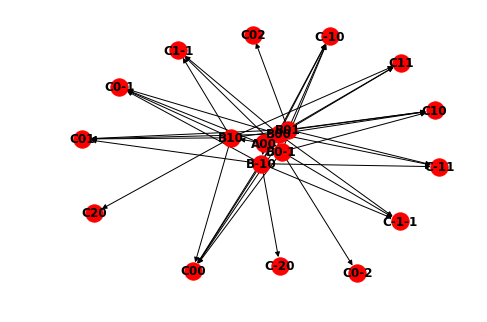

In [244]:
nx.draw(G, with_labels=True, font_weight='bold')

In [245]:
len(G)

19

In [246]:
f3 = func(3)

In [247]:
_ = copy.deepcopy(G.nodes.data())
for node in _:
    if 'C' in node[0]:
        source = node[0]
    else:
        continue
        
    x = node[1]['x']
    y = node[1]['y']
    
    for f in f3:
        if f[1]-x in [-1, 0, 1] and f[2]-y in [-1, 0, 1]:
            G.add_edge(source, f[0])
            G.nodes[f[0]]['x'] = f[1]
            G.nodes[f[0]]['y'] = f[2]

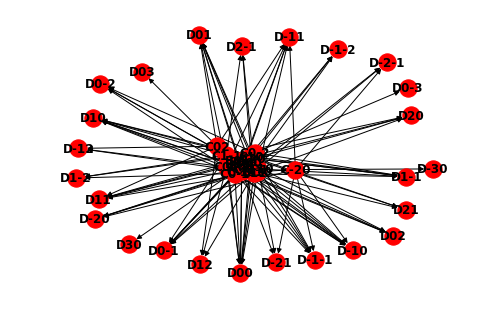

In [248]:
nx.draw(G, with_labels=True, font_weight='bold')

In [249]:
len(G)

44

In [250]:
f4 = func(4)

In [251]:
_ = copy.deepcopy(G.nodes.data())
for node in _:
    if 'D' in node[0]:
        source = node[0]
    else:
        continue
        
    x = node[1]['x']
    y = node[1]['y']
    
    for f in f4:
        if f[1]-x in [-1, 0, 1] and f[2]-y in [-1, 0, 1]:
            G.add_edge(source, f[0])
            G.nodes[f[0]]['x'] = f[1]
            G.nodes[f[0]]['y'] = f[2]

In [252]:
len(G)

85

In [253]:
f5 = func(5)

In [254]:
_ = copy.deepcopy(G.nodes.data())
for node in _:
    if 'E' in node[0]:
        source = node[0]
    else:
        continue
        
    x = node[1]['x']
    y = node[1]['y']
    
    for f in f5:
        if f[1]-x in [-1, 0, 1] and f[2]-y in [-1, 0, 1]:
            G.add_edge(source, f[0])
            G.nodes[f[0]]['x'] = f[1]
            G.nodes[f[0]]['y'] = f[2]

In [255]:
len(G)

146

In [256]:
f6 = func(6)

In [257]:
_ = copy.deepcopy(G.nodes.data())
for node in _:
    if 'F' in node[0]:
        source = node[0]
    else:
        continue
        
    x = node[1]['x']
    y = node[1]['y']
    
    for f in f6:
        if f[1]-x in [-1, 0, 1] and f[2]-y in [-1, 0, 1]:
            G.add_edge(source, f[0])
            G.nodes[f[0]]['x'] = f[1]
            G.nodes[f[0]]['y'] = f[2]

In [258]:
len(G)

231

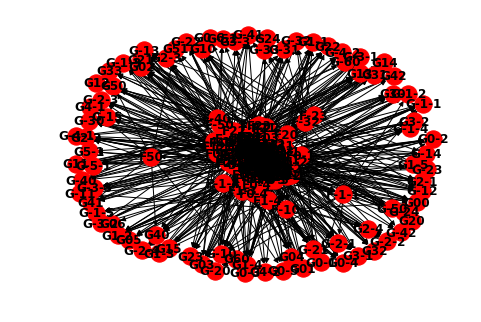

In [259]:
nx.draw(G, with_labels=True, font_weight='bold')

In [305]:
def traverse():
    path = [G['A00']]
    labels = ['A00']
    levels = 6
    for level in range(levels):
        node = path[-1]
        pick = np.random.choice(node)
        path.append(G[pick])
        labels.append(pick)
        
    return labels

In [331]:
df = pd.DataFrame(np.zeros([13,13]))
df.index = range(-6,7)
df.columns = range(-6,7)

In [332]:
for i in range(10000):
    aDict = G.nodes[traverse()[-1]]
    x = aDict['x']
    y = aDict['y']
    
    df[x][y] = df[x][y] + 1

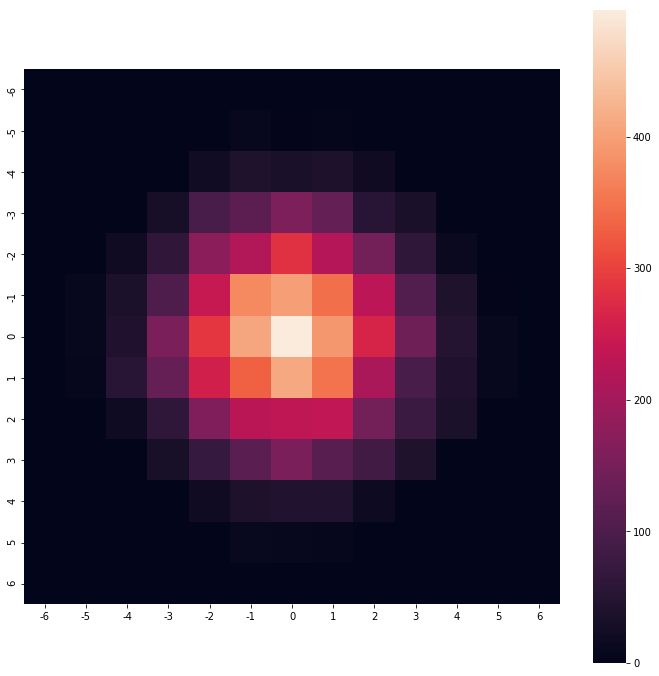

In [333]:
plt.figure(figsize=(12,12))
sns.heatmap(df, square=True)